In [1]:
 from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd /gdrive/MyDrive/Success_or_not

/gdrive/MyDrive/Success_or_not


In [4]:
ls

classification.csv


# Importing Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
import joblib

# Uploading Dataset

In [8]:
df_train=pd.read_csv('classification.csv')
df_train.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   interest  297 non-null    float64
 2   success   297 non-null    float64
dtypes: float64(3)
memory usage: 7.1 KB


In [10]:
df_train.describe().style.background_gradient(axis=0,cmap = 'RdYlGn')

,age,interest,success
count,297.000000,297.000000,297.000000
mean,23.709718,46.986527,0.569024
std,8.864000,21.956447,0.496049
min,2.347560,-0.852800,0.000000
25%,17.002148,28.689067,0.000000
50%,23.283644,45.695926,1.000000
75%,30.661149,65.171876,1.000000
max,45.773729,97.175508,1.000000


# EDA

In [11]:
df_train.isna().sum()

age         0
interest    0
success     0
dtype: int64

In [12]:
df_train.columns

Index(['age', 'interest', 'success'], dtype='object')

In [13]:
columns = df_train.columns
binary_cols = []
remain_cols=[]
for col in columns:
    if df_train[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
    else:
      remain_cols.append(col)

In [14]:
binary_cols

['success']

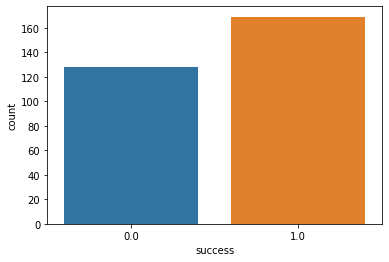

In [16]:
sns.countplot("success", data=df_train)

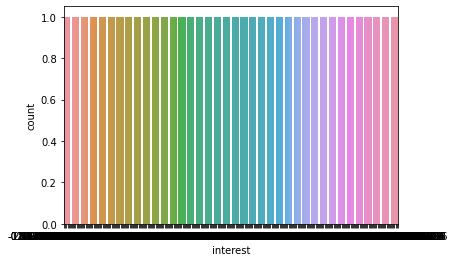

In [17]:
sns.countplot("interest", data=df_train) 

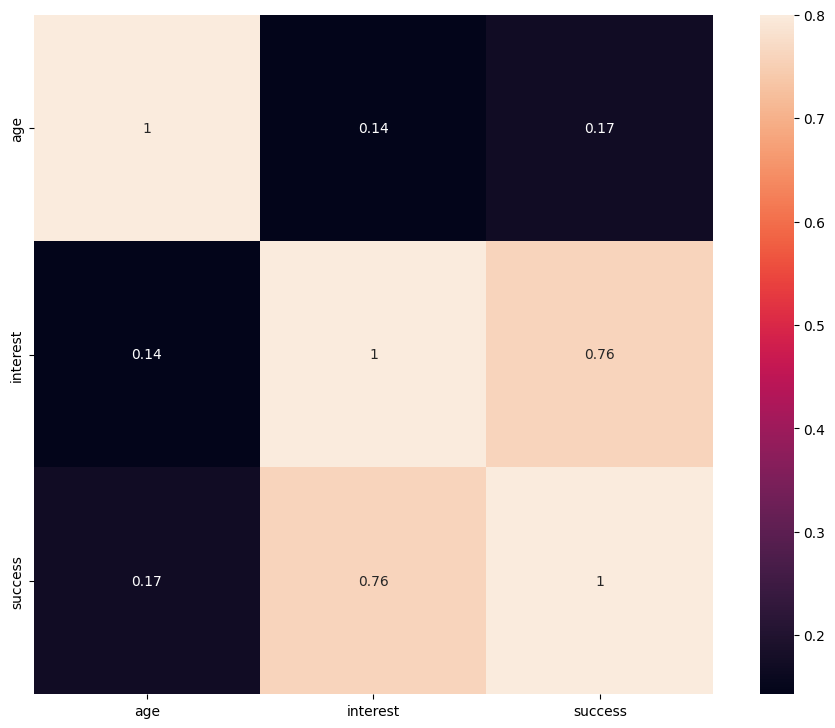

In [18]:
plt.figure(figsize=(12,9),dpi = 100)
sns.heatmap(df_train.corr(),vmax=.8,annot = True, square = True)
plt.show()

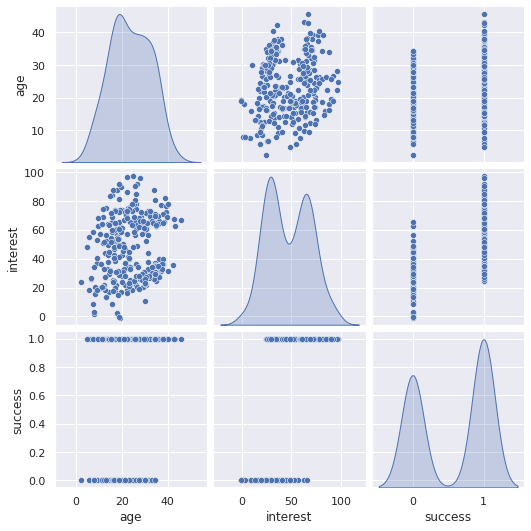

In [19]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df_train.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   

In [20]:
X = df_train.drop(['success'], axis = 1)
Y = df_train["success"]
x_Data = X.values
y_Data = Y.values

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x_Data, y_Data, test_size = 0.2, random_state = 42)

# Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [24]:
model.score(X_test,y_test)

0.9166666666666666

In [25]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(GaussianNB(),X_train, y_train, cv=5))

[0.9375     0.79166667 0.93617021 0.82978723 0.89361702]


In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [27]:
pred = model.predict(X_train) 
accuracy_score(y_train, pred)

0.8734177215189873

In [28]:
confusion_matrix(y_train, pred)

array([[100,   9],
       [ 21, 107]])

In [29]:
predicted_test = model.predict(X_test)
p=accuracy_score(y_test, predicted_test)

In [30]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [31]:
print(classification_report(y_test, predicted_test))

              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88        19
         1.0       0.97      0.90      0.94        41

    accuracy                           0.92        60
   macro avg       0.90      0.92      0.91        60
weighted avg       0.92      0.92      0.92        60



In [32]:
cma = confusion_matrix(y_test, predicted_test)

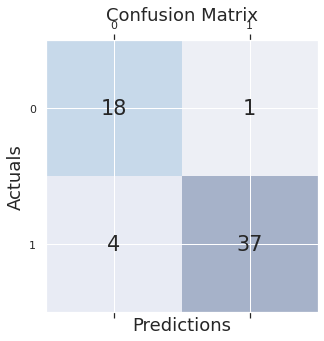

In [33]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Random forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier as rf

In [35]:
clf_forest = rf(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [36]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

1.0

In [37]:
confusion_matrix(y_train, pred)

array([[109,   0],
       [  0, 128]])

In [38]:
pred_test = clf_forest.predict(X_test)
q=accuracy_score(y_test, pred_test)

In [39]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [40]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        19
         1.0       0.98      1.00      0.99        41

    accuracy                           0.98        60
   macro avg       0.99      0.97      0.98        60
weighted avg       0.98      0.98      0.98        60



In [41]:
cma = confusion_matrix(y_test, pred_test)

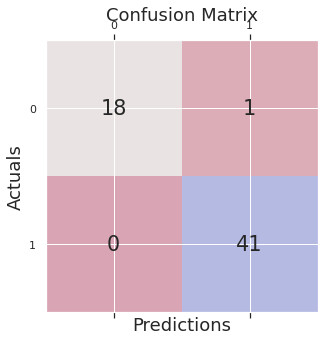

In [42]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Decision Tree Classifier

In [43]:
from sklearn import tree

In [44]:
 clf = tree.DecisionTreeClassifier()
 clf = clf.fit(X_train, y_train)

In [45]:
pred1 = clf.predict(X_train)
accuracy_score(y_train, pred1)

1.0

In [46]:
confusion_matrix(y_train, pred1)

array([[109,   0],
       [  0, 128]])

In [47]:
pred1_test = clf.predict(X_test)
r=accuracy_score(y_test, pred1_test)

In [48]:
print(classification_report(y_test, pred1_test))

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92        19
         1.0       0.97      0.95      0.96        41

    accuracy                           0.95        60
   macro avg       0.94      0.95      0.94        60
weighted avg       0.95      0.95      0.95        60



In [49]:
cma = confusion_matrix(y_test, pred1_test)

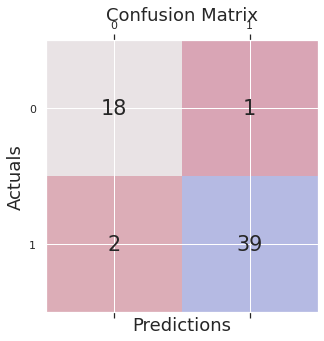

In [50]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression  
clf1= LogisticRegression(random_state=0)  
clf1.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [52]:
pred_LR= clf1.predict(X_train)
accuracy_score(y_train, pred_LR)

0.869198312236287

In [53]:
confusion_matrix(y_train, pred_LR)

array([[ 98,  11],
       [ 20, 108]])

In [54]:
pred_LR_test = clf1.predict(X_test)
s=accuracy_score(y_test, pred_LR_test)

In [55]:
print(classification_report(y_test, pred_LR_test))

              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88        19
         1.0       0.97      0.90      0.94        41

    accuracy                           0.92        60
   macro avg       0.90      0.92      0.91        60
weighted avg       0.92      0.92      0.92        60



In [56]:
cma = confusion_matrix(y_test, pred_LR_test)

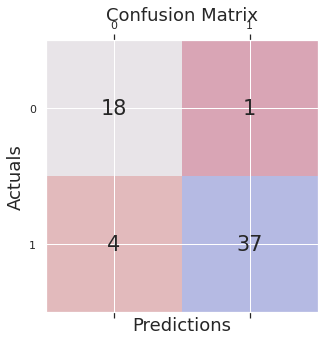

In [57]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Neural networks

In [58]:
from sklearn.neural_network import MLPClassifier

In [59]:
clf2= MLPClassifier(solver='lbfgs', alpha=1e-5,
           hidden_layer_sizes=(5, 2), random_state=1)
clf2.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [60]:
pred_NN= clf2.predict(X_train)
accuracy_score(y_train, pred_NN)

0.869198312236287

In [61]:
confusion_matrix(y_train, pred_NN)

array([[ 98,  11],
       [ 20, 108]])

In [62]:
pred_NN_test = clf2.predict(X_test)
u=accuracy_score(y_test, pred_NN_test)

In [63]:
print(classification_report(y_test, pred_NN_test))

              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88        19
         1.0       0.97      0.90      0.94        41

    accuracy                           0.92        60
   macro avg       0.90      0.92      0.91        60
weighted avg       0.92      0.92      0.92        60



In [64]:
cma = confusion_matrix(y_test, pred_NN_test)

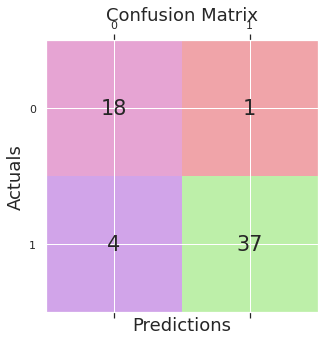

In [65]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# XGBOOST

In [67]:
import xgboost as xgb

In [68]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier()

In [69]:
pred_XGB= xgb.predict(X_train)
accuracy_score(y_train, pred_XGB)

0.9746835443037974

In [70]:
confusion_matrix(y_train, pred_XGB)

array([[106,   3],
       [  3, 125]])

In [71]:
pred_XGB_test = xgb.predict(X_test)
v=accuracy_score(y_test, pred_XGB_test)

In [72]:
print(classification_report(y_test, pred_XGB_test))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        19
         1.0       0.98      0.98      0.98        41

    accuracy                           0.97        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.97      0.97      0.97        60



In [73]:
cma = confusion_matrix(y_test, pred_XGB_test)

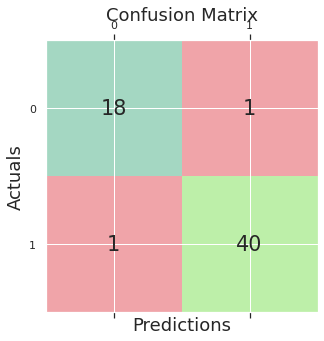

In [74]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Comparative predicting

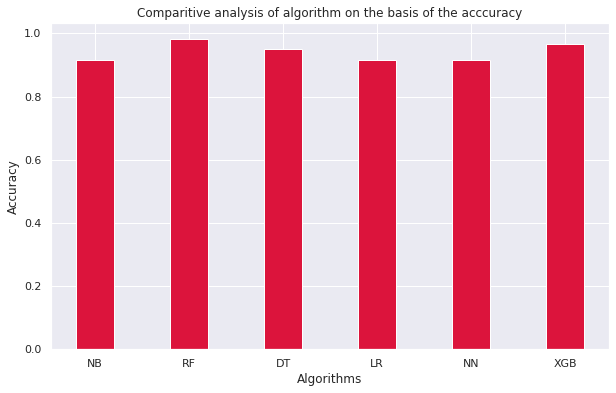

In [75]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'NB':p, 'RF':q, 'DT':r,'LR':s,'NN':u,'XGB':v}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 6))
# creating the bar plot
plt.bar(courses, values, color ='crimson',
		width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparitive analysis of algorithm on the basis of the acccuracy")
plt.show()


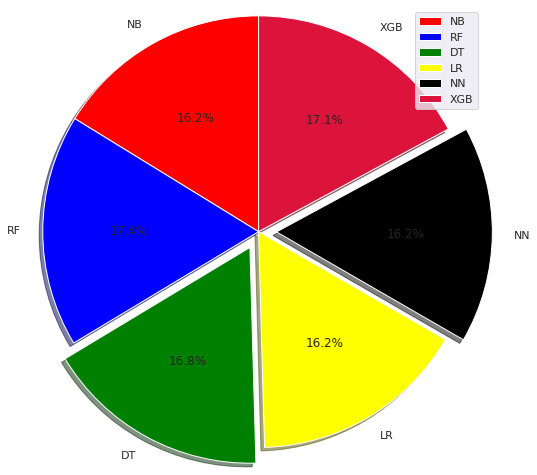

In [76]:
activities = ['NB', 'RF', 'DT', 'LR','NN','XGB'] 
# portion covered by each label
slices = [p,q,r,s,u,v]
 
# color for each label
colors = ['red', 'blue', 'green','yellow','black','crimson']
 
# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors,
        startangle=90, shadow = True, explode = (0, 0, 0.1,0,0.1,0),
        radius = 1.2, autopct = '%1.1f%%')
 
# plotting legend
plt.legend()
 
# showing the plot
plt.show()

# Model saving

In [ ]:
filename = 'naive_bayes.sav'
joblib.dump(model, filename)
filename1 = 'random_forest_Classifier.sav'
joblib.dump(clf_forest, filename1)
filename2 = 'decision_tree_classifier.sav'
joblib.dump(clf, filename2)
filename3 = 'logistic_regression.sav'
joblib.dump(clf1, filename3)
filename4 = 'neural_networks.sav'
joblib.dump(clf2, filename4)
filename5 = 'XGBOOST.sav'
joblib.dump(xgb, filename5)

['XGBOOST.sav']